In [ ]:
#Present your choice of project. 
#Don't just give an ML task, present a specific research question around that task 
#and a biological research question that can be addressed by this. 

In [18]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 5.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 16.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
big-fish 0.6.2 requires scikit-image>=0.14.2, which is not installed.
napari 0.4.17 requires appdirs>=1.4.4, which is not installed.
napari 0.4.17 requires dask[array]!=2.28.0,>=2.15.0, which is not installed.
napari 0.4.17 requires imageio!=2.11.0,!=2.22.1,>=2.5.0, which is not installed.
napari 0.4.17 requires numpydoc>=0.9.2, which is not installed.
napari 0.4.17 requires scikit-image>=0.19.1, which is not installed.
napari 0.4.17 requires tifffile>=2020.2.16, which is not installed.
napari 

In [1]:
import pandas as pd
import numpy as np

/var/folders/06/zgq5nry52cl5j51xzvhlj5240000gn/T/ipykernel_1746/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [52]:
# First Dataset
df1 = pd.read_csv("/Users/danae/Downloads/TCGA_dataset/prediction_file_crc.csv")

# Handle "nan" strings
df1.replace('nan', np.nan, inplace=True)

# Check for missing values and display counts
missing_values_df1 = df1.isna().sum()
print(f"Missing Values in First Dataset:\n{missing_values_df1}\n")

# Remove rows with missing values
df1_cleaned = df1.dropna()
df1_cleaned.dtypes
# Display cleaned DataFrame
print("Cleaned First Dataset:")
#df1_cleaned.head()
df1

Missing Values in First Dataset:
Unnamed: 0                  0
TBL                         0
msi_status                 25
fraction_genome_altered     0
aneuploidy_score            0
TMB                         0
TP53                        0
KRAS                        0
BRAF                        0
APC                         0
TTN                         0
dtype: int64

Cleaned First Dataset:


,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,APC,TTN
0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,SNV,WT
1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,WT,WT
2,TCGA-4T-AA8H-01A,17,Indeterminate,0.242512,8,113,WT,SNV,WT,SNV,WT
3,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,SNV,SNV
4,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,SNV,WT
...,...,...,...,...,...,...,...,...,...,...,...
457,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,SNV,SNV
458,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,SNV,WT
459,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,SNV,WT
460,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,WT,WT


In [53]:
# Replace 0s with NaN in gene expression columns
df2_cleaned[expression_columns] = df2_cleaned[expression_columns].replace(0, np.nan)

# Drop rows where any gene expression is NaN
df2_filtered = df2_cleaned.dropna(subset=expression_columns, how='any')

# Reset the index
df2_filtered.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print("Filtered Second Dataset:")
df2_filtered


Filtered Second Dataset:


,Unnamed: 0,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,ND4,282779.0,527763.0,351929.0,287719.0,190175.0,534458.0,258680.0,609116.0,1788482.0,...,967151.0,253949.0,357582.0,193103.0,378175.0,241368.0,174340.0,344243.0,187689.0,120685.0
1,COX1,174425.0,550980.0,221923.0,77856.0,126014.0,573269.0,334800.0,988344.0,882782.0,...,503826.0,178148.0,277609.0,169953.0,328256.0,270218.0,159090.0,244393.0,186843.0,113810.0
2,COX2,215346.0,455961.0,219310.0,224206.0,121250.0,539229.0,239678.0,729632.0,770006.0,...,688044.0,100534.0,233873.0,148345.0,196468.0,253742.0,107697.0,196681.0,104451.0,99580.0
3,COX3,215935.0,224912.0,194021.0,249685.0,163588.0,640377.0,215029.0,496405.0,509296.0,...,656321.0,119946.0,133931.0,76543.0,247324.0,265639.0,130445.0,200891.0,90755.0,137800.0
4,ACTB,114483.0,273373.0,111800.0,266851.0,94666.0,199718.0,508419.0,342245.0,275784.0,...,264552.0,123410.0,150556.0,171336.0,90398.0,371604.0,124204.0,210810.0,235117.0,150755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13084,PIP5KL1,4.0,39.0,2.0,24.0,12.0,13.0,14.0,4.0,8.0,...,8.0,11.0,7.0,4.0,6.0,12.0,3.0,3.0,249.0,10.0
13085,P2RX5-TAX1BP3,18.0,71.0,13.0,30.0,13.0,21.0,26.0,22.0,18.0,...,28.0,22.0,22.0,12.0,9.0,20.0,25.0,21.0,37.0,15.0
13086,RPS15AP19,8.0,8.0,69.0,8.0,7.0,5.0,13.0,15.0,12.0,...,21.0,11.0,7.0,17.0,43.0,9.0,33.0,20.0,17.0,40.0
13087,LINC00539,19.0,59.0,20.0,17.0,15.0,30.0,30.0,10.0,24.0,...,13.0,63.0,12.0,4.0,19.0,20.0,21.0,8.0,15.0,3.0


In [50]:
# Transpose the second dataframe
df2_transposed = df2_filtered.T
df2_transposed
# Reset the index and use the first row as column names
df2_transposed.reset_index(inplace=True)
df2_transposed.columns = df2_transposed.iloc[0]

# Drop the first row (it's now redundant)
df2_transposed = df2_transposed.iloc[1:]

# Merge the two dataframes based on index with specified suffixes
merged_df = df1.merge(df2_transposed, left_on='Unnamed: 0', right_on='Unnamed: 0', suffixes=('', '_df2'))

# Reset the index of the merged dataframe
merged_df.reset_index(drop=True, inplace=True)
merged_df

,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,APC,...,MIR6724-1,RNA5SP529,SPATA31A5,TRIM60P4Y,H2AB2,RNU6-156P,RN7SL82P,TP53TG3F,OR1S1,DUX4L25
0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,SNV,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,WT,...,0,0,0,0,0,0,0,0,0,0
2,TCGA-4T-AA8H-01A,17,Indeterminate,0.242512,8,113,WT,SNV,WT,SNV,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,SNV,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,SNV,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,SNV,...,0,0,0,0,0,0,0,0,0,0
458,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,SNV,...,0,0,0,0,0,0,0,0,0,0
459,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,SNV,...,0,0,0,0,0,0,0,0,0,0
460,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,WT,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='msi_status'>

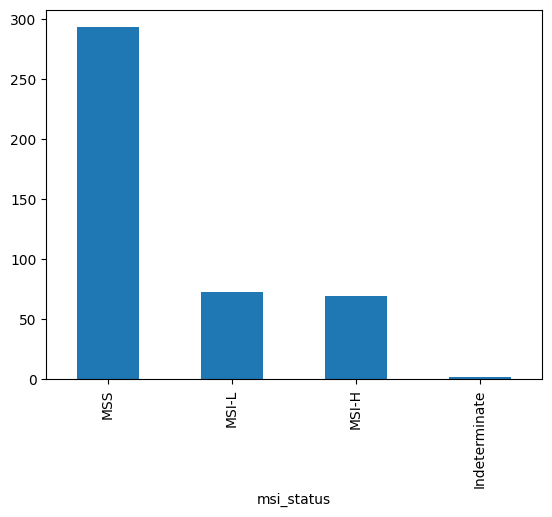

In [55]:
merged_df['msi_status'].value_counts().plot(kind = 'bar')

In [14]:
#oversampling
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['msi_status_encoded'] = label_encoder.fit_transform(merged_df['msi_status'])
y = merged_df['msi_status_encoded']
X = merged_df.drop(['Unnamed: 0', 'msi_status', 'msi_status_encoded'], axis=1)
X = X.select_dtypes(include=[np.number])
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)  
X_resampled, y_resampled = smote.fit_resample(X, y)




In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[58  0  0  1  0]
 [ 0 54  0  1  1]
 [ 0  0 58  7  0]
 [ 0  0 11 43  3]
 [ 0  0  0  0 56]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       1.00      0.96      0.98        56
           2       0.84      0.89      0.87        65
           3       0.83      0.75      0.79        57
           4       0.93      1.00      0.97        56

    accuracy                           0.92       293
   macro avg       0.92      0.92      0.92       293
weighted avg       0.92      0.92      0.92       293

